# Handwritten Digit Recognition - Part 1
## Using 1 layer neural network with 10 neurons

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from IPython import display

tf.set_random_seed(0)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
# parameters
LEARNING_RATES = [0.01, 0.007, 0.003, 0.001, 0.0005]
#LEARNING_RATES = [0.003]
BATCH_SIZE = 100
ITERATION_COUNT = 1000
ACCURACY_CHECK = 10

<IPython.core.display.Javascript object>


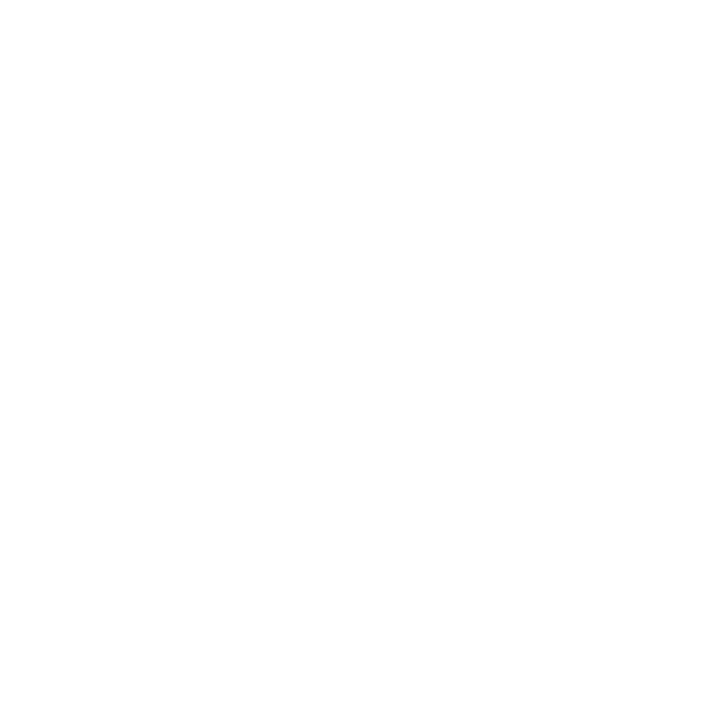

<IPython.core.display.Javascript object>


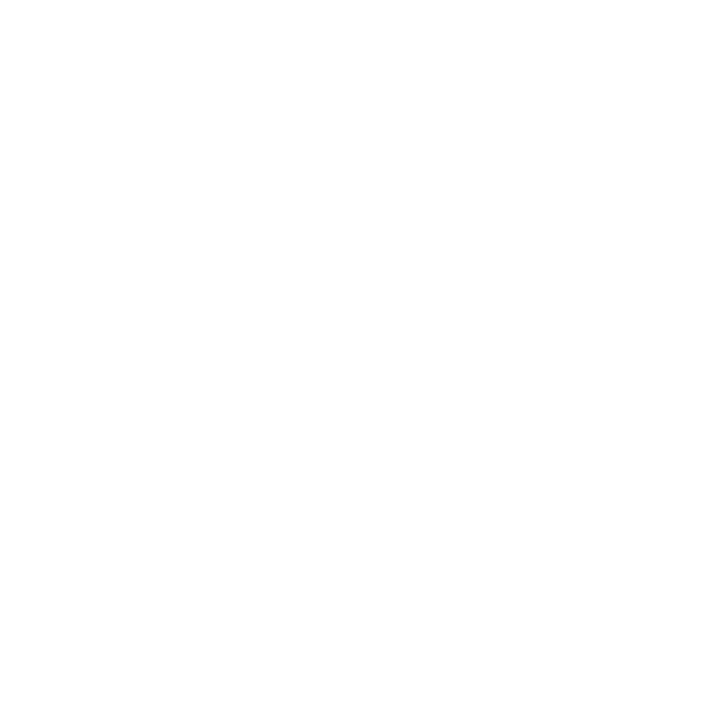

In [15]:
def plot_batch_images(images, labels, predictions):
    plt.rcParams['axes.linewidth'] = 0.5
    view_count = 100
    count_row_col = np.sqrt(view_count)

    fig = plt.figure(figsize=(10, 10))
    
    for i in range(view_count):
        label = labels[i].argmax(axis=0)
        image = images[i].reshape([28,28])
        sub = plt.subplot(count_row_col, count_row_col, i + 1)
        sub.set_xticks(())
        sub.set_yticks(())
        sub.text(1, 1, label, ha='center', va='top', size=8, color="k")
        #sub.text(1, 1, label, ha='right', va='top', size=8, color="r")
        sub.imshow(image, cmap=plt.get_cmap('gray_r'))
    
    fig.tight_layout(pad = 0)
    plt.show()
    
batch_X , batch_Y = mnist.train.next_batch(BATCH_SIZE)
plot_batch_images(batch_X, batch_Y, None)

In [44]:
def train(mnist_data, batch_size, iteration_count, accuracy_check, learning_rate):

    # initialisation
    X = tf.placeholder(tf.float32, shape=[None, 784])
    W = tf.Variable(tf.zeros([784,10]))
    b = tf.Variable(tf.zeros([10]))
    init = tf.global_variables_initializer()

    # start computation
    sess = tf.Session()
    sess.run(init)
    
    # model
    Y = tf.nn.softmax(tf.matmul(X, W) + b)

    # placeholder for correct answers
    Y_ = tf.placeholder(tf.float32, [None, 10])
    
    # loss function
    cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

    # % of correct answers found in batch
    is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_step = optimizer.minimize(cross_entropy)

    # preparing return values
    counter = 0 
    upper_bound = int(iteration_count / accuracy_check)
    iterations = np.arange(0, upper_bound)
    train_accuracy = np.zeros(upper_bound)
    train_loss = np.zeros(upper_bound)
    test_accuracy = np.zeros(upper_bound)
    test_loss = np.zeros(upper_bound)
    
    for i in range(iteration_count):
        
        # load batch of images and correct answers
        batch_X , batch_Y = mnist_data.train.next_batch(batch_size)
        train_data = {X: batch_X, Y_: batch_Y}
        
        # train
        sess.run(train_step, feed_dict = train_data)
        
        if i % accuracy_check == 0:
            
            a , c = sess.run([accuracy, cross_entropy], feed_dict = train_data)
            train_accuracy[counter] = a
            train_loss[counter] = c
            
            test_data = {X: mnist_data.test.images, Y_: mnist_data.test.labels}
            a , c = sess.run([accuracy, cross_entropy], feed_dict = test_data)
            test_accuracy[counter] = a
            test_loss[counter] = c
            counter += 1
    
    acc = accuracy.eval(session=sess, feed_dict={X: mnist_data.test.images, Y_: mnist_data.test.labels})

    print('Learning Rate: {}, Accuracy: {}'.format(learning_rate, acc))
    sess.close()
    
    return iterations, train_accuracy, train_loss, test_accuracy, test_loss;

In [48]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

for i in range(len(LEARNING_RATES)):
    %time acc_check, temp_train_acc, temp_train_loss, temp_test_acc, temp_test_loss = train(mnist, BATCH_SIZE, ITERATION_COUNT, ACCURACY_CHECK, LEARNING_RATES[i])
    train_accuracy.append(temp_train_acc)
    train_loss.append(temp_train_loss)
    test_accuracy.append(temp_test_acc)
    test_loss.append(temp_test_loss)

Learning Rate: 0.01, Accuracy: 0.9171000719070435
Wall time: 5.12 s
Learning Rate: 0.007, Accuracy: 0.9210001230239868
Wall time: 5.13 s
Learning Rate: 0.003, Accuracy: 0.9183000326156616
Wall time: 5.18 s
Learning Rate: 0.001, Accuracy: 0.9091000556945801
Wall time: 5.3 s
Learning Rate: 0.0005, Accuracy: 0.9021000862121582
Wall time: 5.03 s


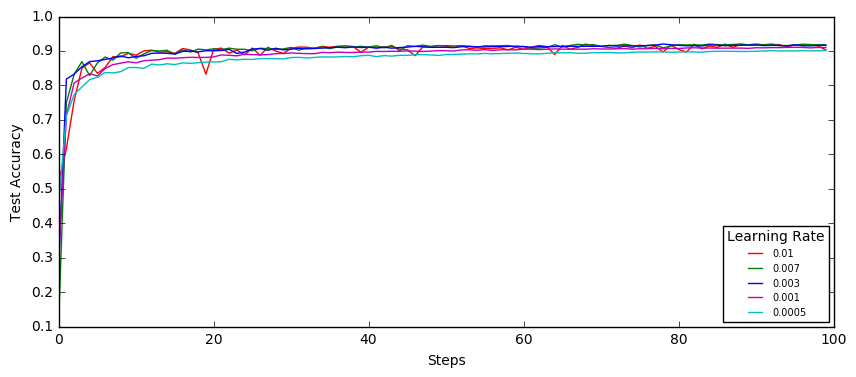

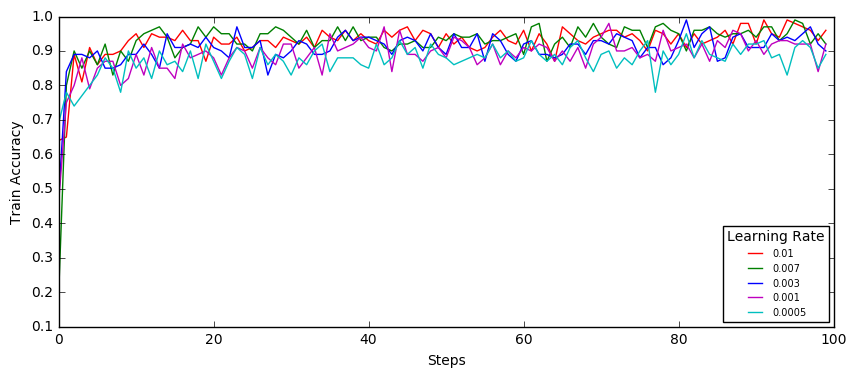

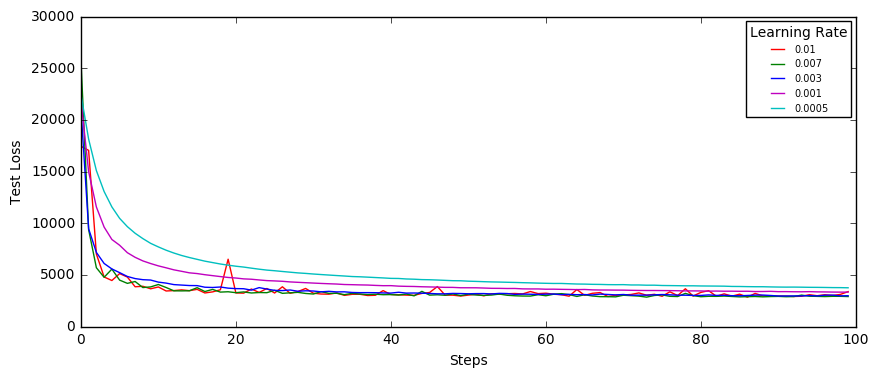

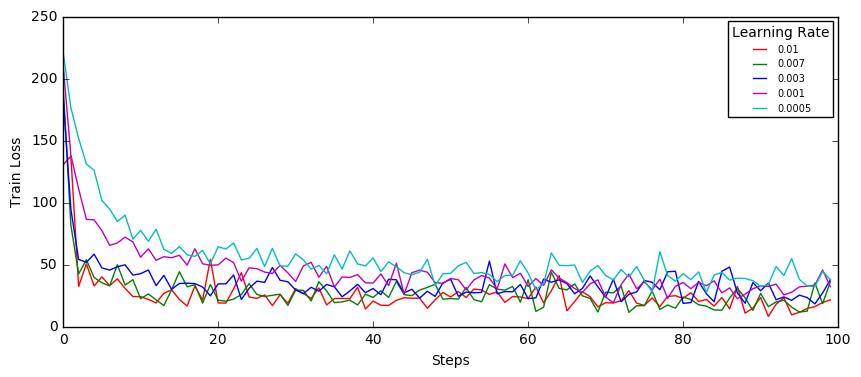

In [49]:
COLORS = ['r', 'g', 'b', 'm', 'c', 'y']

plt.figure(figsize=(10,4))
for i in range(len(LEARNING_RATES)):
    plt.plot(acc_check, test_accuracy[i],c = COLORS[i], label=LEARNING_RATES[i])
    plt.legend(loc='lower right', frameon=True, prop={'size':7}, title="Learning Rate")
    #plt.ylim(ymax = 0.93, ymin = 0.9)
    #plt.xlim(xmax = 100, xmin = 50)

plt.ylabel('Test Accuracy')
plt.xlabel('Steps')
plt.show()

plt.figure(figsize=(10,4))
for i in range(len(LEARNING_RATES)):
    plt.plot(acc_check, train_accuracy[i],c = COLORS[i], label=LEARNING_RATES[i])
    plt.legend(loc='lower right', frameon=True, prop={'size':7}, title="Learning Rate")
    #plt.ylim(ymax = 1, ymin = 0.7)
    #plt.xlim(xmax = 100, xmin = 50)

plt.ylabel('Train Accuracy')
plt.xlabel('Steps')
plt.show()


plt.figure(figsize=(10,4))
for i in range(len(LEARNING_RATES)):
    plt.plot(acc_check, test_loss[i],c = COLORS[i], label=LEARNING_RATES[i])
    plt.legend(loc='upper right', frameon=True, prop={'size':7}, title="Learning Rate")
    #plt.ylim(ymax = 3000, ymin = 2600)
    #plt.xlim(xmax = 100, xmin = 50)

plt.ylabel('Test Loss')
plt.xlabel('Steps')
plt.show()

plt.figure(figsize=(10,4))
for i in range(len(LEARNING_RATES)):
    plt.plot(acc_check, train_loss[i],c = COLORS[i], label=LEARNING_RATES[i])
    plt.legend(loc='upper right', frameon=True, prop={'size':7}, title="Learning Rate")
    #plt.ylim(ymax = 3000, ymin = 2600)
    #plt.xlim(xmax = 100, xmin = 50)

plt.ylabel('Train Loss')
plt.xlabel('Steps')
plt.show()

In [5]:
def plot(x_data, y_data):
    plt.axis([0, 10, 0, 100]) # supoose I know what the limits are going to be
    plt.ion()
    plt.show()
    x = []
    y = []
    
    for i in range(x_data.size):
        x = np.append(x, x_data[i])
        y = np.append(y, y_data[i])

        plt.gca().cla() 
        plt.plot(x, y, label='Training')
        plt.legend(loc='lower right', frameon=False)
        #plt.ylim(ymax = 1.1, ymin = 0.7)
        plt.ylabel('Accuracy')
        plt.xlabel('Step')
        display.clear_output(wait=True)
        display.display(plt.gcf()) 
        time.sleep(0.1) 

<IPython.core.display.Javascript object>


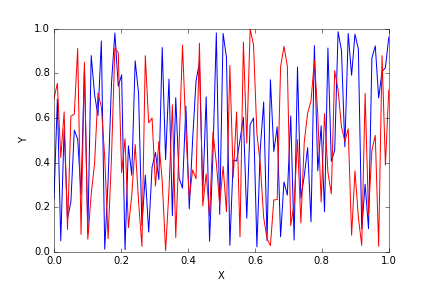

<IPython.core.display.Javascript object>


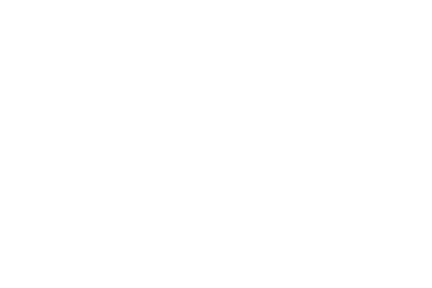

In [12]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)